In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))

In [32]:
from utils import get_paper_details

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

----

### Get citation graph for an individual paper

In [3]:
paper_id = "10.18653/v1/2021.emnlp-main.446" # Transformer Feed-Forward Layers Are Key-Value Memories

paper = get_paper_details(paper_id)

In [4]:
paper.to_df()

,paper_id,title,venue,year,citation_count,influential_citation_count,embedding
0,10.18653/v1/2021.emnlp-main.446,Transformer Feed-Forward Layers Are Key-Value ...,Conference on Empirical Methods in Natural Lan...,2020,233,29,"[-1.698096752166748, -0.04015412926673889, 2.0..."


In [5]:
paper.retrieve_citations(limit=1000) # 1000 is the maximum

In [8]:
len(paper.citations)

233

In [6]:
paper.citations[0].to_df()

,paper_id,title,venue,year,citation_count,influential_citation_count,embedding,cites_result,cites_methodology,cites_background,was_influenced,contexts
0,7808f614d993cae3ae2cfd3afc32f8d9191f7126,Model Editing Can Hurt General Abilities of La...,,2024,0,0,None,False,False,True,False,"[…recently, a surge of works have investigated..."


In [9]:
citation_graph = paper.citations_to_df()

In [10]:
citation_graph.head()

,paper_id,title,venue,year,citation_count,influential_citation_count,embedding,cites_result,cites_methodology,cites_background,was_influenced,contexts
0,7808f614d993cae3ae2cfd3afc32f8d9191f7126,Model Editing Can Hurt General Abilities of La...,,2024.0,0,0,None,False,False,True,False,"[…recently, a surge of works have investigated..."
1,b97f9c9ecd9222b74b93205ac792f8e3cad4aec3,MPN: Leveraging Multilingual Patch Neuron for ...,,2024.0,0,0,None,False,False,True,True,[The structure of the FFN layer with the added...
2,26b2adbe089ea36617c3ec0aa009319929da0550,A Mechanistic Understanding of Alignment Algor...,,2024.0,0,0,None,False,False,True,False,[The goal of mechanistic interpretability is l...
3,0251bb95be75d472c8d5b873751615e7fe2feb1d,A Comprehensive Study of Knowledge Editing for...,arXiv.org,2024.0,3,0,None,False,False,True,False,[Geva et al. [40] proposes that the FFN layers...
4,6789e0a19f70e283b120fd6a3792162d01a021d5,Do Androids Know They're Only Dreaming of Elec...,,2023.0,0,0,None,False,False,True,False,[Related work has studied how transformers ret...


In [14]:
len(citation_graph)

233

----

### Visualizations

In [11]:
citation_stats = citation_graph['citation_count']
influential_citation_stats = citation_graph['influential_citation_count']

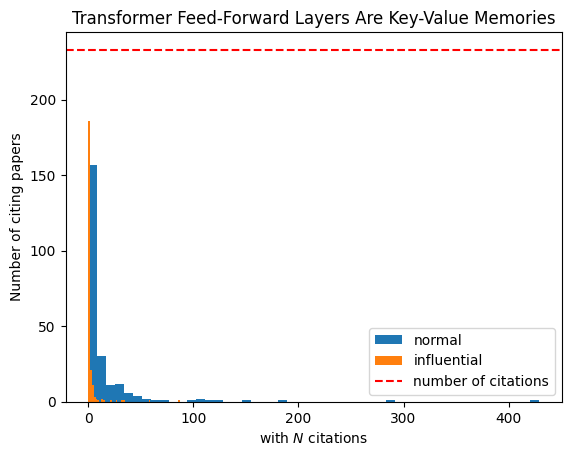

In [19]:
fig, axes = plt.subplots()

axes.hist(citation_stats, bins=50, label="normal")
axes.hist(influential_citation_stats, bins=50, label="influential")

# add number of papers that cite this paper
axes.axhline(len(citation_graph), linestyle="--", color="red", label="number of citations")

# axes.set_yscale("log")

axes.set_ylabel("Number of citing papers")
axes.set_xlabel(f"with $N$ citations")

axes.set_title(paper.title)
axes.legend(loc="best");

In [22]:
influential_papers = citation_graph[citation_graph["was_influenced"]]
influential_papers.head()

,paper_id,title,venue,year,citation_count,influential_citation_count,embedding,cites_result,cites_methodology,cites_background,was_influenced,contexts
1,b97f9c9ecd9222b74b93205ac792f8e3cad4aec3,MPN: Leveraging Multilingual Patch Neuron for ...,,2024.0,0,0,None,False,False,True,True,[The structure of the FFN layer with the added...
8,3dc0cc75f32900320fcf31b4dc12c8101fe374d5,Emergence Learning: A Rising Direction from Em...,,2023.0,0,0,None,False,True,True,True,[To provide interpretability in the feed-forwa...
23,e5379c6b2328c1d4832a2efaf276e49324fbb05a,Trends in Integration of Knowledge and Large L...,arXiv.org,2023.0,6,0,None,False,False,True,True,[Following the perspective that knowledge resi...
31,41a3c41ba1912e1384849e6898c241af89cc4a11,DEPN: Detecting and Editing Privacy Neurons in...,Conference on Empirical Methods in Natural Lan...,2023.0,1,0,None,False,False,True,True,"[Second, the Memory-based Editing strategy (Mi..."
32,7c57530318ae6c6e49c835f23e75affd9cf0827d,Analyzing Vision Transformers for Image Classi...,arXiv.org,2023.0,1,0,None,False,True,True,True,"[For example, in NLP transformers some keys in..."


In [23]:
normal_papers = citation_graph[citation_graph["was_influenced"] == False]
normal_papers.head()

,paper_id,title,venue,year,citation_count,influential_citation_count,embedding,cites_result,cites_methodology,cites_background,was_influenced,contexts
0,7808f614d993cae3ae2cfd3afc32f8d9191f7126,Model Editing Can Hurt General Abilities of La...,,2024.0,0,0,None,False,False,True,False,"[…recently, a surge of works have investigated..."
2,26b2adbe089ea36617c3ec0aa009319929da0550,A Mechanistic Understanding of Alignment Algor...,,2024.0,0,0,None,False,False,True,False,[The goal of mechanistic interpretability is l...
3,0251bb95be75d472c8d5b873751615e7fe2feb1d,A Comprehensive Study of Knowledge Editing for...,arXiv.org,2024.0,3,0,None,False,False,True,False,[Geva et al. [40] proposes that the FFN layers...
4,6789e0a19f70e283b120fd6a3792162d01a021d5,Do Androids Know They're Only Dreaming of Elec...,,2023.0,0,0,None,False,False,True,False,[Related work has studied how transformers ret...
5,5c7a21e9262b62f0a27fefdc8b1270dfdcbd3912,The Truth is in There: Improving Reasoning in ...,,2023.0,1,0,None,False,False,True,False,[Some theories posit that information about di...


In [24]:
citation_type_influential = {r: influential_papers[r].sum() for r in ["cites_result", "cites_methodology", "cites_background"]}
citation_type_normal = {r: normal_papers[r].sum() for r in ["cites_result", "cites_methodology", "cites_background"]}

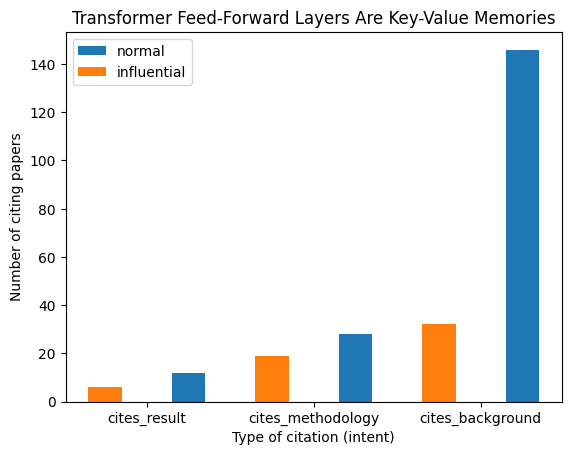

In [25]:
fig, axes = plt.subplots()

axes.bar([0.25, 1.25, 2.25], citation_type_normal.values(), width=0.2, label="normal")
axes.bar([-0.25, 0.75, 1.75], citation_type_influential.values(), width=0.2, label="influential")

axes.set_ylabel("Number of citing papers")
axes.set_xlabel(f"Type of citation (intent)")
axes.set_xticks([0, 1, 2])
axes.set_xticklabels(citation_type_influential.keys())

axes.set_title(paper.title)
axes.legend(loc="best");


In [26]:
citations_per_year = citation_graph.groupby(['year'])['year'].count()

In [35]:
citations_per_year

year
2020.0      2
2021.0     17
2022.0     44
2023.0    162
2024.0      4
Name: year, dtype: int64

229


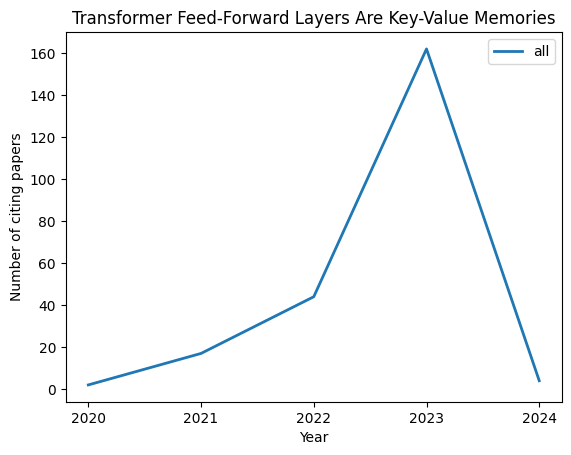

In [33]:
fig, axes = plt.subplots()

counts = citations_per_year.values
axes.plot(counts, linewidth=2.0, label="all")

axes.set_ylabel("Number of citing papers")
axes.set_xlabel(f"Year")

years = [int(year) for year in citations_per_year.index]
axes.set_xticks(range(len(years)))
axes.set_xticklabels(years)
# axes.set_xticklabels(intent_influential.keys())

axes.set_title(paper.title)
axes.legend(loc="best")

# print(np.sum(counts))
